# Comparison of the performances for the different models

Trained models: random forest, perceptron (with and without elasticnet regularization), SVM

## Loading necessary libraries...

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import seaborn

## Loading results

In [2]:
methods = ["RF", "RF", "RRandomForest", "RRandomForest", "Perceptron", "Perceptron", "SVC", "SVC", "RSVM", "RSVM", 
           "GNN_Chereda_Adj_Filtered_List", "GNN_Chereda_Adj_Filtered_List", "GNN_Chereda_Adj_Spearman", 
           "GNN_Ramirez_Adj_Filtered_List", "GNN_Ramirez_Adj_Filtered_List", "GNN_Ramirez_Adj_Spearman", 
           "DNN_patient", "DNN_patient", "GNN_patient", "GNN_patient"]
dates = ["2023-11-09", "2023-11-09", "2023-11-09", "2023-11-09", "2023-11-09", "2023-11-09", "2023-11-09", 
         "2023-11-09", "2023-11-09", "2023-11-09", "2023-11-09", "2023-11-09", "2023-11-09", "2023-11-09", 
         "2023-11-09", "2023-11-09","2023-11-09", "2023-11-09", "2023-11-09", "2023-11-09"]
prep = ["PPI", "Spearman", "PPI", "Spearman", "PPI", "Spearman", "PPI", "Spearman", "PPI", "Spearman", 
        "0Con_Block_PPI1", "0Con_Block_PPIA", "6P_Block_6P", "0Con_Block_PPI1", "0Con_Block_PPIA", "6P_Block_6P", 
        "PPI", "Spearman", "PPI", "Spearman"]
all_scores = {}
metnames = ["RF_PPI", "RF_Spearman", "RRF_PPI", "RRF_Spearman", "Perceptron_PPI", "Perceptron_Spearman", "SVC_PPI",
            "SVC_Spearman", "RSVM_PPI", "RSVM_Spearman", "GNNChereda_PPI", "GNNChereda_PPI+singleton",
            "GNNChereda_Spearman", "GNNRamirez_PPI", "GNNRamirez_PPI+singleton", "GNNRamirez_Spearman", 
            "DNNpatient_PPI", "DNNpatient_Spearman", "GNNpatient_PPI", "GNNpatient_Spearman"]
for ind in range(len(methods)):
    file = "../../results/CancerType/" + methods[ind] + "_" + prep[ind] + "_Scores_" + dates[ind] + ".obj"
    file = open(file, "rb")
    desc_met = metnames[ind]
    all_scores[desc_met] = pickle.load(file)

## Computing means and standard deviations

### Means

In [3]:
scorelist = ["fit_time", "score_time", "test_accuracy", "test_balanced_accuracy", "test_roc_auc","train_accuracy","train_balanced_accuracy"]
all_means = np.empty((len(metnames), len(scorelist)))

for i in range(len(metnames)):
    for j in range(len(scorelist)):
        all_means[i][j] = np.stack(all_scores[metnames[i]][scorelist[j]]).mean()

# Create the pandas DataFrame
all_means = pd.DataFrame(all_means, columns = scorelist, index = metnames)
# print dataframe.
all_means

fit_time  score_time  test_accuracy  \
RF_PPI                      86.673681    2.975729       0.933599   
RF_Spearman                 75.907950    3.081089       0.936017   
RRF_PPI                   6727.877400    9.030600       0.933895   
RRF_Spearman              5536.686200    8.481400       0.936185   
Perceptron_PPI             123.464734    0.504178       0.952570   
Perceptron_Spearman         97.215227    0.440124       0.954596   
SVC_PPI                    590.520350  911.387595       0.936567   
SVC_Spearman               493.015372  774.266166       0.939640   
RSVM_PPI                  2405.271800  649.408600       0.936388   
RSVM_Spearman             2270.027000  603.168800       0.939640   
GNNChereda_PPI             605.031587    1.183030       0.949584   
GNNChereda_PPI+singleton   604.653372    1.194740       0.951579   
GNNChereda_Spearman        507.196747    1.050727       0.950422   
GNNRamirez_PPI              12.607362    0.174402       0.922835   
GNNRamirez_PPI+singleton    13.439368    0.196576       0.774748   
GNNRamirez_Spearman         11.038899    0.150763       0.938303   
DNNpatient_PPI               9.680000    1.794249       0.941110   
DNNpatient_Spearman          8.641657    2.871564       0.945162   
GNNpatient_PPI              42.464831    8.742409       0.941400   
GNNpatient_Spearman         34.919328   14.012415       0.947521   

                          test_balanced_accuracy  test_roc_auc  \
RF_PPI                                  0.892391      0.997497   
RF_Spearman                             0.899598      0.996659   
RRF_PPI                                 0.893667      0.997227   
RRF_Spearman                            0.900946      0.996620   
Perceptron_PPI                          0.930619      0.998030   
Perceptron_Spearman                     0.941124      0.998375   
SVC_PPI                                 0.901921      0.997858   
SVC_Spearman                            0.910314      0.997780   
RSVM_PPI                                0.901642      0.997095   
RSVM_Spearman                           0.910314      0.997028   
GNNChereda_PPI                          0.928005      0.998092   
GNNChereda_PPI+singleton                0.932914      0.997983   
GNNChereda_Spearman                     0.934069      0.998411   
GNNRamirez_PPI                          0.893507      0.997075   
GNNRamirez_PPI+singleton                0.748127      0.898760   
GNNRamirez_Spearman                     0.912885      0.997308   
DNNpatient_PPI                          0.906274      0.996584   
DNNpatient_Spearman                     0.922674      0.998007   
GNNpatient_PPI                          0.906260      0.997625   
GNNpatient_Spearman                     0.917414      0.997556   

                          train_accuracy  train_balanced_accuracy  
RF_PPI                          1.000000                 1.000000  
RF_Spearman                     1.000000                 1.000000  
RRF_PPI                         1.000000                 1.000000  
RRF_Spearman                    1.000000                 1.000000  
Perceptron_PPI                  0.999955                 0.999980  
Perceptron_Spearman             0.999050                 0.999190  
SVC_PPI                         0.955284                 0.931829  
SVC_Spearman                    0.958490                 0.936087  
RSVM_PPI                        0.955396                 0.931982  
RSVM_Spearman                   0.958536                 0.936121  
GNNChereda_PPI                  1.000000                 1.000000  
GNNChereda_PPI+singleton        1.000000                 1.000000  
GNNChereda_Spearman             1.000000                 1.000000  
GNNRamirez_PPI                  0.935868                 0.910775  
GNNRamirez_PPI+singleton        0.804328                 0.787254  
GNNRamirez_Spearman             0.954465                 0.935160  
DNNpatient_PPI                  0.984962                 

### Standard deviations

In [4]:
all_std = np.empty((len(metnames), len(scorelist)))

for i in range(len(metnames)):
    for j in range(len(scorelist)):
        all_std[i][j] = np.stack(all_scores[metnames[i]][scorelist[j]]).std()

# Create the pandas DataFrame
all_std = pd.DataFrame(all_std, columns = scorelist, index = metnames)
# print dataframe.
all_std

fit_time  score_time  test_accuracy  \
RF_PPI                     0.304288    0.094840       0.007014   
RF_Spearman                0.610747    0.029918       0.002801   
RRF_PPI                   41.992702    0.122258       0.006222   
RRF_Spearman              48.879032    0.189469       0.003629   
Perceptron_PPI            18.062599    0.014025       0.003143   
Perceptron_Spearman       11.559289    0.009099       0.004478   
SVC_PPI                    4.186438   15.177734       0.004396   
SVC_Spearman               5.289309   28.182892       0.002216   
RSVM_PPI                  15.643623    4.067790       0.004370   
RSVM_Spearman             38.470558    6.186646       0.002216   
GNNChereda_PPI             6.078502    0.034931       0.004262   
GNNChereda_PPI+singleton   3.907393    0.022126       0.000868   
GNNChereda_Spearman        1.877588    0.019548       0.003997   
GNNRamirez_PPI             0.990012    0.012134       0.009054   
GNNRamirez_PPI+singleton   0.941256    0.011642       0.341828   
GNNRamirez_Spearman        0.801207    0.007163       0.002017   
DNNpatient_PPI             1.979498    0.072325       0.007068   
DNNpatient_Spearman        0.323527    1.574514       0.003477   
GNNpatient_PPI             4.709277    0.098822       0.004404   
GNNpatient_Spearman        2.395014    4.955825       0.005195   

                          test_balanced_accuracy  test_roc_auc  \
RF_PPI                                  0.007988      0.000836   
RF_Spearman                             0.007519      0.002104   
RRF_PPI                                 0.005355      0.000976   
RRF_Spearman                            0.005566      0.001418   
Perceptron_PPI                          0.005421      0.000837   
Perceptron_Spearman                     0.007386      0.000371   
SVC_PPI                                 0.002048      0.000838   
SVC_Spearman                            0.007787      0.000718   
RSVM_PPI                                0.001645      0.001242   
RSVM_Spearman                           0.007787      0.000976   
GNNChereda_PPI                          0.006339      0.000790   
GNNChereda_PPI+singleton                0.004569      0.000417   
GNNChereda_Spearman                     0.002509      0.000447   
GNNRamirez_PPI                          0.015308      0.001256   
GNNRamirez_PPI+singleton                0.359436      0.199381   
GNNRamirez_Spearman                     0.004027      0.000688   
DNNpatient_PPI                          0.013358      0.001417   
DNNpatient_Spearman                     0.016815      0.000380   
GNNpatient_PPI                          0.013275      0.000916   
GNNpatient_Spearman                     0.012076      0.000690   

                          train_accuracy  train_balanced_accuracy  
RF_PPI                          0.000000                 0.000000  
RF_Spearman                     0.000000                 0.000000  
RRF_PPI                         0.000000                 0.000000  
RRF_Spearman                    0.000000                 0.000000  
Perceptron_PPI                  0.000055                 0.000025  
Perceptron_Spearman             0.001266                 0.001259  
SVC_PPI                         0.000896                 0.001911  
SVC_Spearman                    0.001311                 0.002170  
RSVM_PPI                        0.000901                 0.001859  
RSVM_Spearman                   0.001340                 0.002177  
GNNChereda_PPI                  0.000000                 0.000000  
GNNChereda_PPI+singleton        0.000000                 0.000000  
GNNChereda_Spearman             0.000000                 0.000000  
GNNRamirez_PPI                  0.012112                 0.021570  
GNNRamirez_PPI+singleton        0.351060                 0.379003  
GNNRamirez_Spearman             0.003965                 0.002803  
DNNpatient_PPI                  0.010035                 0.015940  
DNNpatient_Spearman          

## Plotting results

### Averaged results

In [5]:
train_time = all_means["fit_time"]
my_cmap = plt.get_cmap("hsv")

def autolabel(rectangles):
    """attach some text vi autolabel on rectangles."""
    for rect in rectangles:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2.0,
            1.05 * height,
            "%.4f" % height,
            ha="center",
            va="bottom",
        )
        plt.setp(plt.xticks()[1], rotation=30)

plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), train_time, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(train_time) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("runtime (s)")
ax.set_title("Training times")
plt.tight_layout()
plt.show()

In [6]:
predict_time = all_means["score_time"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), predict_time, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(predict_time) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("runtime (s)")
ax.set_title("Prediction times")
plt.tight_layout()
plt.show()

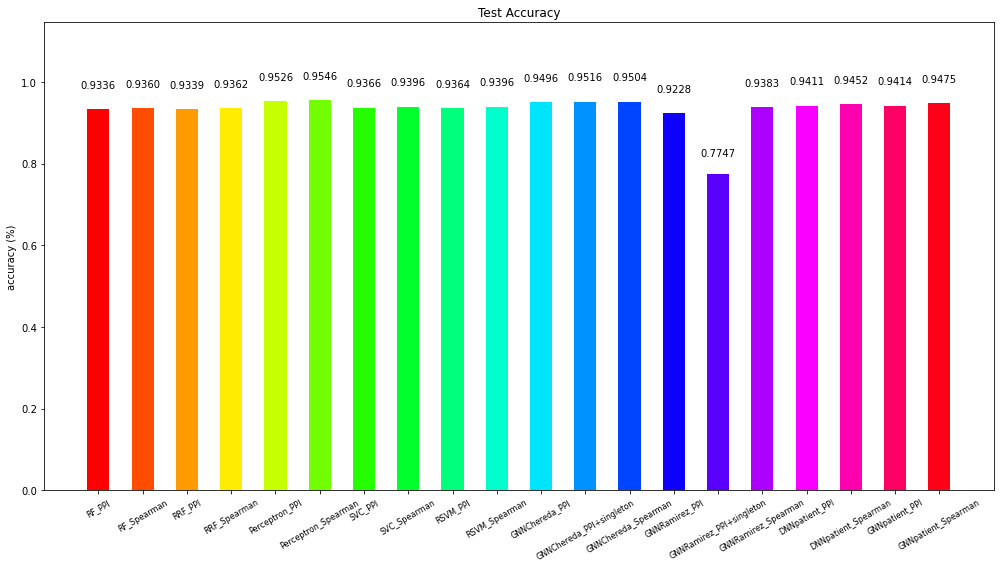

In [7]:
accuracy = all_means["test_accuracy"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), accuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(accuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("accuracy (%)")
ax.set_title("Test Accuracy")
autolabel(rectangles)
plt.tight_layout()
plt.show()

In [8]:
baccuracy = all_means["test_balanced_accuracy"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), baccuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(baccuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("accuracy (%)")
ax.set_title("Test balanced accuracy")
autolabel(rectangles)
plt.tight_layout()
plt.show()

In [9]:
auc = all_means["test_roc_auc"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), auc, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(auc) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("ROC AUC")
ax.set_title("Test AUC")
autolabel(rectangles)
plt.tight_layout()
plt.show()

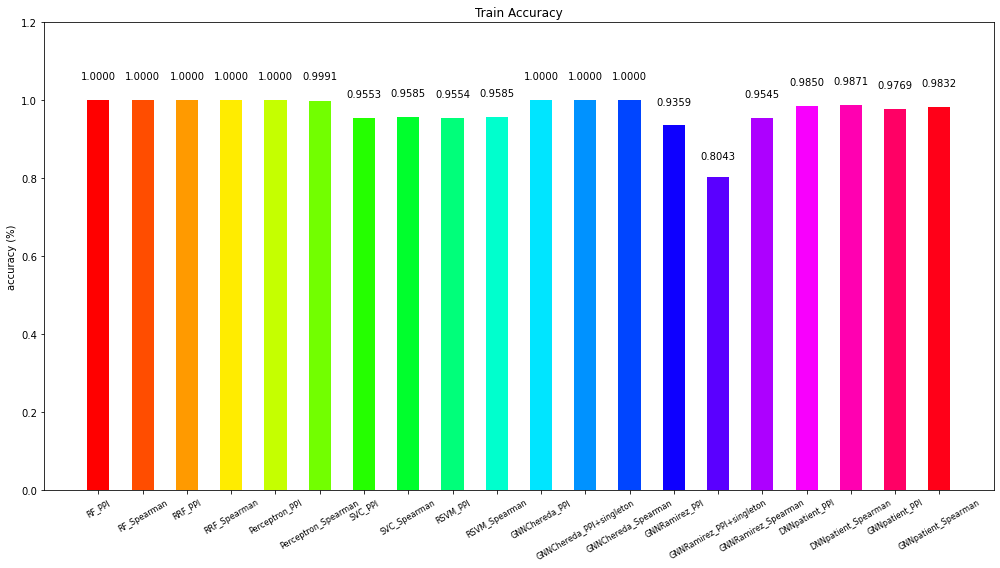

In [10]:
accuracy = all_means["train_accuracy"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), accuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(accuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("accuracy (%)")
ax.set_title("Train Accuracy")
autolabel(rectangles)
plt.tight_layout()
plt.show()

In [11]:
baccuracy = all_means["train_balanced_accuracy"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), baccuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(baccuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("accuracy (%)")
ax.set_title("Train balanced accuracy")
autolabel(rectangles)
plt.tight_layout()
plt.show()

### Full distribution

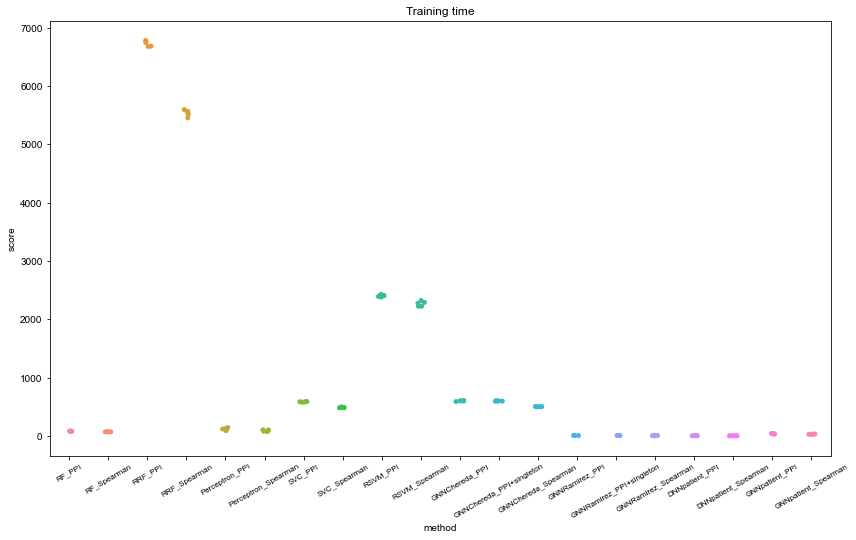

In [12]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*5, dtype = dt)

for i in range(len(metnames)):
    for j in range(5):
        cur_data[i*5+j]["method"] = metnames[i]
        cur_data[i*5+j]["score"] = all_scores[metnames[i]]["fit_time"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Training time")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

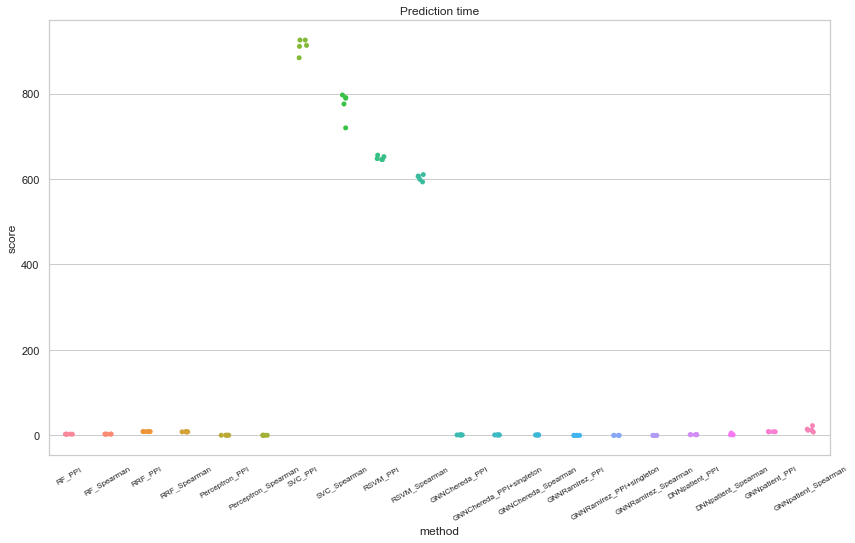

In [13]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*5, dtype = dt)

for i in range(len(metnames)):
    for j in range(5):
        cur_data[i*5+j]["method"] = metnames[i]
        cur_data[i*5+j]["score"] = all_scores[metnames[i]]["score_time"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Prediction time")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

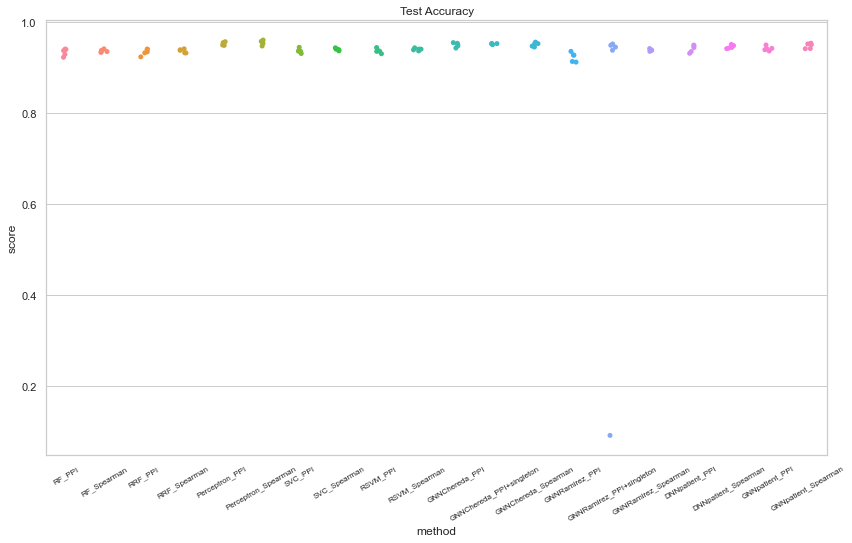

In [14]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*5, dtype = dt)

for i in range(len(metnames)):
    for j in range(5):
        cur_data[i*5+j]["method"] = metnames[i]
        cur_data[i*5+j]["score"] = all_scores[metnames[i]]["test_accuracy"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Test Accuracy")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

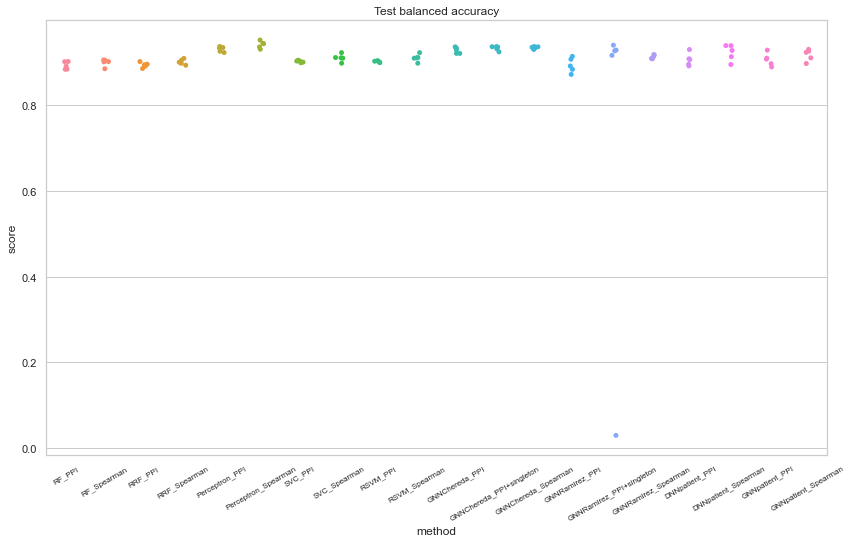

In [15]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*5, dtype = dt)

for i in range(len(metnames)):
    for j in range(5):
        cur_data[i*5+j]["method"] = metnames[i]
        cur_data[i*5+j]["score"] = all_scores[metnames[i]]["test_balanced_accuracy"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Test balanced accuracy")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

In [16]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*5, dtype = dt)
for i in range(len(metnames)):
   for j in range(5):
       cur_data[i*5+j]["method"] = metnames[i]
       cur_data[i*5+j]["score"] = all_scores[metnames[i]]["test_roc_auc"][j]
cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Test AUC")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

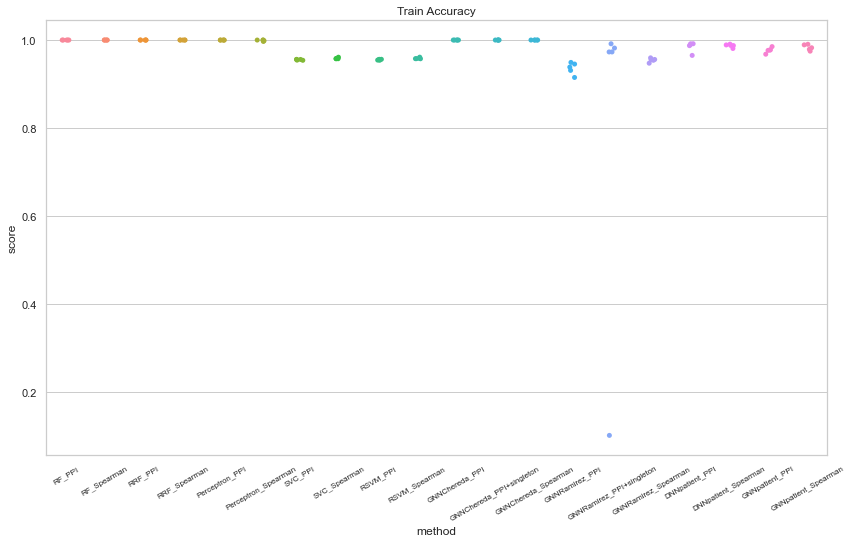

In [17]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*5, dtype = dt)

for i in range(len(metnames)):
    for j in range(5):
        cur_data[i*5+j]["method"] = metnames[i]
        cur_data[i*5+j]["score"] = all_scores[metnames[i]]["train_accuracy"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Train Accuracy")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

In [18]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*5, dtype = dt)

for i in range(len(metnames)):
    for j in range(5):
        cur_data[i*5+j]["method"] = metnames[i]
        cur_data[i*5+j]["score"] = all_scores[metnames[i]]["train_balanced_accuracy"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Train balanced accuracy")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()